# Notebook to select columns useful for SED fitting with CIGALE

## We will select the continuum from Laigle et al., 2015 + redshifts; emission lines from FMOS

## No need to have lines for the SED fitting but for the comparison

### Photometry in mJy and emission line fluxes correcte dby apperture and in W/m$^2$

In [2]:
# Importing regular packages. The herschelhelp_internal.utils is already installed in my machine
# so the only thing I have to do is to run the 'source activate herschelhelp_internal' in the terminal 
# and after that change the kernel in the notebook. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.table import Table, Column, vstack
import pandas as pd
import scipy.integrate as integrate
import os
from astropy import units as u
from uncertainties import ufloat
from uncertainties.umath import *
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz
from matplotlib.legend_handler import HandlerPathCollection

%matplotlib inline

In [4]:
# Laigle et al., 2015 and FMOS data sets
# Merged data set

data  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_Laigle/'
                   'COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

# lines = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FMOS/'
#                    'fmos_cosmos_spectroscopy_extra.v20180725.fits', format = 'fits')

# data  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/'
#                    'Laigle_FMOS_2021_0.1arcsec.fits', format = 'fits')

In [8]:
print('Number of sources in the Laigle et al., catalog:')
len(data)

Number of sources in the Laigle et al., catalog:


1182108

In [9]:
Bands_Laigle = ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
               'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
               'H_FLUX_APER3', 'Ks_FLUX_APER3', 'SPLASH_1_FLUX', 'SPLASH_2_FLUX',\
               'SPLASH_3_FLUX', 'SPLASH_4_FLUX', 'F_MIPS_24']

In [10]:
bands_nolines = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B', 'subaru.suprime.V', 'subaru.suprime.r',
                 'subaru.suprime.i', 'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H', 'WFCAM_K',
                 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4']

wl_phot = [2.29924500e-01, 3.82657613e-01, 4.44802344e-01, 5.47022023e-01,
           6.27552396e-01, 7.67126647e-01, 9.02821612e-01, 9.78660196e-01,
           1.25358020e+00, 1.62868125e+00, 2.23330676e+00, 3.55669064e+00,
           4.50196520e+00, 5.74500412e+00, 7.91821223e+00]

# Correcting Photometry

In [12]:
# Aperture magnitudes must be corrected (MAG_APER3)
# Following appendix 2 in Laigle et al., 2016

#NOTE: this procedure can be avoided if one used MAG_AUTO. However, this measurements are 
# noisier than the ones computed using MAG_APER3 which must be taken into account for photometric redshift
# calculations. The total fluxes must not be too different, only for the faintest sources. 

flux_aper      =   ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
                    'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
                    'H_FLUX_APER3', 'Ks_FLUX_APER3', 'Hw_FLUX_APER3', 'Ksw_FLUX_APER3']

fluxerr_aper   =   ['u_FLUXERR_APER3', 'B_FLUXERR_APER3', 'V_FLUXERR_APER3', 'r_FLUXERR_APER3',\
                    'ip_FLUXERR_APER3', 'zpp_FLUXERR_APER3', 'yHSC_FLUXERR_APER3', 'J_FLUXERR_APER3',\
                    'H_FLUXERR_APER3', 'Ks_FLUXERR_APER3', 'Hw_FLUXERR_APER3', 'Ksw_FLUXERR_APER3']

mag_auto       =   ['u_MAG_AUTO', 'B_MAG_AUTO', 'V_MAG_AUTO', 'r_MAG_AUTO',\
                    'ip_MAG_AUTO', 'zpp_MAG_AUTO', 'yHSC_MAG_AUTO', 'J_MAG_AUTO',\
                    'H_MAG_AUTO', 'Ks_MAG_AUTO', 'Hw_MAG_AUTO', 'Ksw_MAG_AUTO']

mag_auto_sigma =   ['u_MAGERR_AUTO', 'B_MAGERR_AUTO', 'V_MAGERR_AUTO', 'r_MAGERR_AUTO',\
                    'ip_MAGERR_AUTO', 'zpp_MAGERR_AUTO', 'yHSC_MAGERR_AUTO', 'J_MAGERR_AUTO',\
                    'H_MAGERR_AUTO', 'Ks_MAGERR_AUTO', 'Hw_MAGERR_AUTO', 'Ksw_MAGERR_AUTO']

mag_aper       =   ['u_MAG_APER3', 'B_MAG_APER3', 'V_MAG_APER3', 'r_MAG_APER3',\
                    'ip_MAG_APER3', 'zpp_MAG_APER3', 'yHSC_MAG_APER3', 'J_MAG_APER3',\
                    'H_MAG_APER3', 'Ks_MAG_APER3', 'Hw_MAG_APER3', 'Ksw_MAG_APER3']

mag_aper_sigma =   ['u_MAGERR_APER3', 'B_MAGERR_APER3', 'V_MAGERR_APER3', 'r_MAGERR_APER3',\
                    'ip_MAGERR_APER3', 'zpp_MAGERR_APER3', 'yHSC_MAGERR_APER3', 'J_MAGERR_APER3',\
                    'H_MAGERR_APER3', 'Ks_MAGERR_APER3', 'Hw_MAGERR_APER3', 'Ksw_MAGERR_APER3']

In [13]:
# Laigle et al., 2016 table 3, page 8
systematic_offset_perband   = [0.010, 0.146, -0.117, -0.012,\
                               0.020, -0.084, -0.014, 0.017,\
                               0.055, -0.001, -0.031, 0.068]

foreground_extinction       = [4.660, 4.020, 3.117, 2.660,\
                               1.991, 1.461, 1.298, 0.871,\
                               0.563, 0.364, 0.563, 0.364]

systematic_uncertainty_UD   = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 3.3,\
                               3.1, 3.1, 3.2, 3.4]

systematic_uncertainty_Deep = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 2.9,\
                               2.9, 2.6, 3.2, 3.4]

# Number of measurements. Number of bands involved
N = len(data)
D = len(flux_aper)

In [14]:
#===================================================================================================================
# Correcting the magnitudes
#===================================================================================================================

photometric_offset_mag = data['OFFSET']

magnitudes_corrected   = np.zeros((N,D))
for j in range(len(data)):
    for i in range(len(systematic_offset_perband)):
    
        mag_aper_perband  = data[mag_aper[i]][j]
    
        mag_total = mag_aper_perband + photometric_offset_mag[j] - systematic_offset_perband[i] -\
                    data['EBV'][j]*foreground_extinction[i]
    
        magnitudes_corrected[j][i] = mag_total
                

corrected_mag_err        = np.zeros((N,D))
for j in range(len(data)):
    for i in range(len(systematic_offset_perband)):
        
        err_aper3 = data[mag_aper_sigma[i]][j]

        err_total = err_aper3

        corrected_mag_err[j][i] = err_total       


# Fluxes are retrieved in Jy     
corrected_fluxes       = ( 10**( (8.9 - magnitudes_corrected)/2.5 ) )
corrected_fluxes_err   =  corrected_mag_err * corrected_fluxes * ( np.log(10)/2.5 )

# Fluxes are added in µJy
corrected_fluxes       = corrected_fluxes*1e6
corrected_fluxes_err   = corrected_fluxes_err*1e6

In [15]:
# Sending the total mag per band into an array

mag_total       =   ['u_MAG_TOT', 'B_MAG_TOT', 'V_MAG_TOT', 'r_MAG_TOT',\
                    'ip_MAG_TOT', 'zpp_MAG_TOT', 'yHSC_MAG_TOT', 'J_MAG_TOT',\
                    'H_MAG_TOT', 'Ks_MAG_TOT', 'Hw_MAG_TOT', 'Ksw_MAG_TOT']

index = [data['ID2013'][i] for i in range(len(data))]

df = pd.DataFrame(magnitudes_corrected, index=index, columns =mag_total, dtype = 'float64')


# Saving the total flux and total flux err per band
flux_total      =   ['u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                    'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                    'H_FLUX_TOT', 'Ks_FLUX_TOT', 'Hw_FLUX_TOT', 'Ksw_FLUX_TOT']

flux_total_err  =   ['u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                    'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                    'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err', 'Hw_FLUX_TOT_err', 'Ksw_FLUX_TOT_err']

index_1 = [data['ID2013'][i] for i in range(len(data))]

df_1   = pd.DataFrame(corrected_fluxes, index=index_1, columns =flux_total, dtype = 'float64')
df_2   = pd.DataFrame(corrected_fluxes_err, index=index_1, columns =flux_total_err, dtype = 'float64')

fluxes_corrected = pd.concat([df_1, df_2], axis=1, sort=False)

In [16]:
# New total fluxes are added to the original merged and crossmatched table
# A new table is saved as 'final_sample.fits'

fluxes_laigle_corrected = Table.from_pandas(fluxes_corrected)
fluxes_laigle_corrected = Table.to_pandas(fluxes_laigle_corrected)

original_laigle_sample  = data.to_pandas()

sample = pd.concat([original_laigle_sample, fluxes_laigle_corrected], axis=1, sort=False)

sample = Table.from_pandas(sample)

/Users/lam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
# Errors and fluxes for bands which originally are -99.0 are converted to -9999.99
for j in range(len(flux_total_err)):
    for i in range(len(sample)):
        if(sample[flux_total_err[j]][i]<0):
            sample[flux_total[j]][i] = -9999.99
            sample[flux_total_err[j]][i] = -9999.99

# Avoiding strange values in the file and changing units

In [18]:
# Changing units for CIGALE and correcting data
#===================================================================================================================
uJy_to_mJy = 1e-3    # microJy to milliJY

flux_tot       = ['FLUX_GALEX_NUV',\
                  'u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                  'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                  'H_FLUX_TOT', 'Ks_FLUX_TOT',\
                  'SPLASH_1_FLUX', 'SPLASH_2_FLUX', 'SPLASH_3_FLUX', 'SPLASH_4_FLUX']

fluxerr_tot    = ['FLUXERR_GALEX_NUV',\
                  'u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                  'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                  'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err',\
                  'SPLASH_1_FLUX_ERR', 'SPLASH_2_FLUX_ERR', 'SPLASH_3_FLUX_ERR', 'SPLASH_4_FLUX_ERR']


for i in range (len(flux_tot)):   
    sample[flux_tot[i]]    = sample[flux_tot[i]]*uJy_to_mJy
    sample[fluxerr_tot[i]] = sample[fluxerr_tot[i]]*uJy_to_mJy

In [19]:
# Filling inf values to 'nan' and then to -9999.99 for the histograms
# Also to be consistent

sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.fillna(-9999.99)
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.replace(-99.0, -9999.99)
sample = sample.replace(-99.9, -9999.99)
sample = sample.replace(-99.99, -9999.99)
sample = Table.from_pandas(sample)

In [20]:
# Negative fluxes and errors are changed to -9999.99 

for i in range(len(flux_tot)):
    for j in range(len(sample)):
        if (sample[flux_tot[i]][j] < 0.0):
            sample[flux_tot[i]][j]     = -9999.99
            sample[fluxerr_tot[i]][j]  = -9999.99

In [21]:
def lambda_redshift(L_obs, L_Lyman):
    return(L_obs/L_Lyman - 1.0)

# Filters
# http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?mode=browse&gname=GALEX&asttype=

l_min = [1692.52, 3142.90, 3670.71, 4839.52, 5431.56, 6769.48, 8123.59, 9000.00, 11690.00, 14628.97, 20290.00,
        31296.24, 39173.28, 48982.77, 62993.78]

for i in range(len(bands_nolines)):
    print('%21s exlude galxies z > %.3f'%(bands_nolines[i], lambda_redshift(l_min[i], 912.0)))

# Erasing values at contaminated by the Lyman break

for i in range(len(flux_tot)):
    for j in range(len(sample)):
        if (sample['PHOTOZ'][j] > lambda_redshift(l_min[i], 912.0)):
            sample[flux_tot[i]][j]     = -9999.99
            sample[fluxerr_tot[i]][j]  = -9999.99

            galex.NUV exlude galxies z > 0.856
       cfht.megacam.u exlude galxies z > 2.446
     subaru.suprime.B exlude galxies z > 3.025
     subaru.suprime.V exlude galxies z > 4.306
     subaru.suprime.r exlude galxies z > 4.956
     subaru.suprime.i exlude galxies z > 6.423
     subaru.suprime.z exlude galxies z > 7.907
         subaru.hsc.y exlude galxies z > 8.868
           UKIRT_WFCJ exlude galxies z > 11.818
        cfht.wircam.H exlude galxies z > 15.041
              WFCAM_K exlude galxies z > 21.248
                IRAC1 exlude galxies z > 33.316
                IRAC2 exlude galxies z > 41.953
                IRAC3 exlude galxies z > 52.709
                IRAC4 exlude galxies z > 68.072


# Saving first files without any selection

In [22]:
os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/')

0

In [30]:
# Saving the file as it is with the process above to above re-running
# In case someone wants to add more info to the files
# This is the most general file

CIGALE_0 = sample

CIGALE_0.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_Laigle_MOONS_2021.fits', format='fits')

In [37]:
# Final sample to be used for scientific analysis

CIGALE_1 = Table([    sample['NUMBER'], sample['PHOTOZ'],\
                      sample['FLUX_GALEX_NUV'], sample['FLUXERR_GALEX_NUV'],\
                      sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                      sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'],\
                      sample['V_FLUX_TOT'], sample['V_FLUX_TOT_err'],\
                      sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                      sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'],\
                      sample['zpp_FLUX_TOT'], sample['zpp_FLUX_TOT_err'],\
                      sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                      sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'],\
                      sample['H_FLUX_TOT'], sample['H_FLUX_TOT_err'],\
                      sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                      sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'],\
                      sample['SPLASH_2_FLUX'], sample['SPLASH_2_FLUX_ERR'],\
                      sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                      sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR']],\
              
               names = ('id','redshift',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_Laigle_MOONS_cigale_2021.fits')
CIGALE_1.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_Laigle_MOONS_cigale_2021.fits', format='fits')

In [40]:
# Final version with Coordinates, Mass and SFR

CIGALE_2 = Table([    sample['ALPHA_J2000'], sample['DELTA_J2000'],\
                      sample['NUMBER'], sample['PHOTOZ'],\
                      sample['MASS_BEST'], sample['SFR_BEST'], sample['SSFR_BEST'],\
                      sample['MASS_MED'], sample['SFR_MED'], sample['SSFR_MED'],\
                      sample['FLUX_GALEX_NUV'], sample['FLUXERR_GALEX_NUV'],\
                      sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                      sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'],\
                      sample['V_FLUX_TOT'], sample['V_FLUX_TOT_err'],\
                      sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                      sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'],\
                      sample['zpp_FLUX_TOT'], sample['zpp_FLUX_TOT_err'],\
                      sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                      sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'],\
                      sample['H_FLUX_TOT'], sample['H_FLUX_TOT_err'],\
                      sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                      sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'],\
                      sample['SPLASH_2_FLUX'], sample['SPLASH_2_FLUX_ERR'],\
                      sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                      sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR']],\
              
               names = ('RA_Laigle','DEC_Laigle',\
                        'id_Laigle','PHOTOZ_Laigle',\
                        'MASS_BEST', 'SFR_BEST', 'sSFR_BEST',\
                        'MASS_MED', 'SFR_MED', 'sSFR_MED',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_cigale_2021_All-info.fits')
CIGALE_2.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_cigale_2021_All-info.fits', format='fits')

# PHOTOZ > 0 and different from -9999.99 or 9.99 selection

In [41]:
sample_z_cut     = sample[(sample['PHOTOZ'] > 0)&(sample['PHOTOZ'] != 9.99)&(sample['PHOTOZ'] != -9999.99)]
# sample_cut_lines = sample_cut_z[(sample_cut_z['FLUX_HALPHA']   > 0)&
#                                 (sample_cut_z['FLUX_OIII5007'] > 0)&
#                                 (sample_cut_z['FLUX_HBETA']    > 0)&
#                                 (sample_cut_z['FLUX_NII6584']  > 0)]

# Negative fluxes and errors are changed to -9999.99 
        
for i in range(len(flux_tot)):
    for j in range(len(sample_z_cut)):
        if (sample_z_cut[flux_tot[i]][j] < 0.0):
            sample_z_cut[flux_tot[i]][j]     = -9999.99
            sample_z_cut[fluxerr_tot[i]][j]  = -9999.99

In [44]:
# Final sample_z_cut to be used for scientific analysis

CIGALE_3 = Table([    sample_z_cut['NUMBER'], sample_z_cut['PHOTOZ'],\
                      sample_z_cut['FLUX_GALEX_NUV'], sample_z_cut['FLUXERR_GALEX_NUV'],\
                      sample_z_cut['u_FLUX_TOT'], sample_z_cut['u_FLUX_TOT_err'],\
                      sample_z_cut['B_FLUX_TOT'], sample_z_cut['B_FLUX_TOT_err'],\
                      sample_z_cut['V_FLUX_TOT'], sample_z_cut['V_FLUX_TOT_err'],\
                      sample_z_cut['r_FLUX_TOT'], sample_z_cut['r_FLUX_TOT_err'],\
                      sample_z_cut['ip_FLUX_TOT'], sample_z_cut['ip_FLUX_TOT_err'],\
                      sample_z_cut['zpp_FLUX_TOT'], sample_z_cut['zpp_FLUX_TOT_err'],\
                      sample_z_cut['yHSC_FLUX_TOT'], sample_z_cut['yHSC_FLUX_TOT_err'],\
                      sample_z_cut['J_FLUX_TOT'], sample_z_cut['J_FLUX_TOT_err'],\
                      sample_z_cut['H_FLUX_TOT'], sample_z_cut['H_FLUX_TOT_err'],\
                      sample_z_cut['Ks_FLUX_TOT'], sample_z_cut['Ks_FLUX_TOT_err'],\
                      sample_z_cut['SPLASH_1_FLUX'], sample_z_cut['SPLASH_1_FLUX_ERR'],\
                      sample_z_cut['SPLASH_2_FLUX'], sample_z_cut['SPLASH_2_FLUX_ERR'],\
                      sample_z_cut['SPLASH_3_FLUX'], sample_z_cut['SPLASH_3_FLUX_ERR'],\
                      sample_z_cut['SPLASH_4_FLUX'], sample_z_cut['SPLASH_4_FLUX_ERR']],\
              
               names = ('id','redshift',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_2021_zCUT.fits')
CIGALE_3.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_2021_zCUT.fits', format='fits')

In [46]:
# Final version with FMOS ID, Coordinates, Mass and SFR and z_cut

CIGALE_4 = Table([    sample_z_cut['ALPHA_J2000'], sample_z_cut['DELTA_J2000'],\
                      sample_z_cut['NUMBER'], sample_z_cut['PHOTOZ'],\
                      sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'], sample_z_cut['SSFR_BEST'],\
                      sample_z_cut['MASS_MED'], sample_z_cut['SFR_MED'], sample_z_cut['SSFR_MED'],\
                      sample_z_cut['FLUX_GALEX_NUV'], sample_z_cut['FLUXERR_GALEX_NUV'],\
                      sample_z_cut['u_FLUX_TOT'], sample_z_cut['u_FLUX_TOT_err'],\
                      sample_z_cut['B_FLUX_TOT'], sample_z_cut['B_FLUX_TOT_err'],\
                      sample_z_cut['V_FLUX_TOT'], sample_z_cut['V_FLUX_TOT_err'],\
                      sample_z_cut['r_FLUX_TOT'], sample_z_cut['r_FLUX_TOT_err'],\
                      sample_z_cut['ip_FLUX_TOT'], sample_z_cut['ip_FLUX_TOT_err'],\
                      sample_z_cut['zpp_FLUX_TOT'], sample_z_cut['zpp_FLUX_TOT_err'],\
                      sample_z_cut['yHSC_FLUX_TOT'], sample_z_cut['yHSC_FLUX_TOT_err'],\
                      sample_z_cut['J_FLUX_TOT'], sample_z_cut['J_FLUX_TOT_err'],\
                      sample_z_cut['H_FLUX_TOT'], sample_z_cut['H_FLUX_TOT_err'],\
                      sample_z_cut['Ks_FLUX_TOT'], sample_z_cut['Ks_FLUX_TOT_err'],\
                      sample_z_cut['SPLASH_1_FLUX'], sample_z_cut['SPLASH_1_FLUX_ERR'],\
                      sample_z_cut['SPLASH_2_FLUX'], sample_z_cut['SPLASH_2_FLUX_ERR'],\
                      sample_z_cut['SPLASH_3_FLUX'], sample_z_cut['SPLASH_3_FLUX_ERR'],\
                      sample_z_cut['SPLASH_4_FLUX'], sample_z_cut['SPLASH_4_FLUX_ERR']],\
              
               names = ('RA_Laigle','DEC_Laigle',\
                        'id_Laigle','PHOTOZ_Laigle',\
                        'MASS_BEST', 'SFR_BEST', 'sSFR_BEST',\
                        'MASS_MED', 'SFR_MED', 'sSFR_MED',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_2021_All-info_zCUT.fits')
CIGALE_4.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/COSMOS_laigle_MOONS_2021_All-info_zCUT.fits', format='fits')

# Adding emission lines and fake galaxy for the fits-simulation to the redshift cut sample

In [56]:
# This file is for the MOONS consortium
# I need to fit the photometry, no IR and no lines
# Lines will be predicted by the HII-region models

MOONS_file = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                        'COSMOS_laigle_MOONS_2021_zCUT.fits', format = 'fits')

os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/file_lines/')

# Creating a fake vector filled with -9999.99 values

empty = np.empty(len(MOONS_file))
empty.fill(-9999.99)
          
lines = ['Ly-alpha',
         'HeII-164.0',
         'OIII-166.5',
         'CIII-190.9',
         'MgII-279.8',
         'OII-372.7',
         'H-9',
         'NeIII-386.9',
         'HeI-388.9',
         'H-8',
         'NeIII-396.8',
         'H-epsilon',
         'H-delta',
         'H-gamma',
         'OIII-436.3',
         'H-beta',
         'OIII-495.9',
         'OIII-500.7',
         'HeI-587.6',
         'OI-630.0',
         'NII-654.8',
         'H-alpha',
         'NII-658.4',
         'SII-671.6',
         'SII-673.1', 
         'ArIII-713.6']

# lines = ['line.SII-671.6', 'line.SII-673.1', 'line.NeIII-386.9', 
#          'line.OII-372.7', 'line.OII-372.9', 'line.OI-630.0',
#          'line.OIII-495.9', 'line.NII-654.8',
#          'line.NII-654.8+line.NII-658.4', 'line.SII-671.6+line.SII-673.1', 'line.OII-372.7+line.OII-372.9']

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/file_lines/COSMOS_laigle_MOONS_2021_zCUT_BPT.fits')

for i in range(len(lines)):
    new_col     = Column(empty, name='line.'+lines[i])
    new_col_err = Column(empty, name='line.'+lines[i]+'_err')
    
    MOONS_file.add_column(new_col)
    MOONS_file.add_column(new_col_err)
    
# Fake galaxy is filtered to be added
fake  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                   'COSMOS_laigle_MOONS_2021_zCUT.fits', format  = 'fits')
fake  = fake[fake['id'] == 993206]

for i in range(len(lines)):
    fake['line.'+lines[i]]        = 8.271998799359089e-19
    fake['line.'+lines[i]+'_err'] = 8.271998799359089e-21

# Adding fake galaxy
MOONS_file = vstack([MOONS_file, fake])    
MOONS_file['id'][:][-1] = -999999    # This is the fake galaxy ID 

    
MOONS_file.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/file_lines/'
                 'COSMOS_laigle_MOONS_2021_zCUT_BPT.fits', format = 'fits')

# Redshift binning

## This files need to be put in CIGALE to get M$_\mathrm{star}$ and SFR in each bin to lately be splitted into gas-phase metallicity bins

In [59]:
# I use the zCUT file because contains positive redshifts
# It also contains the fake emission lines for CIGALE
# Fitting with or without lines can be done with the same file. It only changes in the 'pcigale.ini'

MOONS_file_zCUT = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/file_lines/'
                             'COSMOS_laigle_MOONS_2021_zCUT_BPT.fits', format = 'fits')

In [70]:
os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/FILES_redshift_bins/')

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/FILES_redshift_bins/*.fits')

min_val = MOONS_file_zCUT['redshift'].min() - 0.005 # 0.005 is the minimum redshift in the sample
max_val = MOONS_file_zCUT['redshift'].max()

a = abs(min_val)
while(a <= max_val):
    step = 0.5
    sample = MOONS_file_zCUT[(MOONS_file_zCUT['redshift']>a)&(MOONS_file_zCUT['redshift']<a+step)]
    
    os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/Redshift_%.2f-%.2f/'%(a, a+step))

    # Saving files together in the same folder
    sample.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/FILES_redshift_bins/'
                 'COSMOS_laigle_MOONS_2021_zCUT_BPT_%.2f-%.2f_All-info_zCUT.fits'%(a, a+step), format = 'fits')  
    
    # Saving files in each folder where the metallicity bins per reshfit will be stored
    sample.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/Redshift_%.2f-%.2f/'
                 'COSMOS_laigle_MOONS_2021_zCUT_BPT_%.2f-%.2f_All-info_zCUT.fits'%(a, a+step, a, a+step), format = 'fits')
    
    print('Redshift range %.2f - %.2f, objects = %i'%(a, a+step, len(sample)))
    a += step
# os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/FILES_redshift_bins/*_All-info_zCUT.fits')
del(a)

Redshift range 0.00 - 0.50, objects = 84041
Redshift range 0.50 - 1.00, objects = 127756
Redshift range 1.00 - 1.50, objects = 93535
Redshift range 1.50 - 2.00, objects = 74054
Redshift range 2.00 - 2.50, objects = 48402
Redshift range 2.50 - 3.00, objects = 37135
Redshift range 3.00 - 3.50, objects = 24341
Redshift range 3.50 - 4.00, objects = 13790
Redshift range 4.00 - 4.50, objects = 8346
Redshift range 4.50 - 5.00, objects = 4110
Redshift range 5.00 - 5.50, objects = 2355
Redshift range 5.50 - 6.00, objects = 422


# Checking the sample at redshift 1.5 to 2.0 with Laigle data

In [161]:
sample_z_cut = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                          'COSMOS_laigle_MOONS_2021_All-info_zCUT.fits', format='fits')


In [166]:
sample_z = sample_z_cut[(sample_z_cut['PHOTOZ_Laigle']>1.5)&(sample_z_cut['PHOTOZ_Laigle']<2.0)]

In [145]:
#Main- relationSequence
#Schreiber et al., 2015
#https://www.aanda.org/articles/aa/pdf/2015/03/aa25017-14.pdf
def MS(z, M_star):
    r  = np.log10(1.0 + z)
    m  = np.log10(M_star / 10**9) #In M_sun^-1
    m0 = 0.5; a0 = 1.5; a1 = 0.3; m1 = 0.36; a2 = 2.5
    return (m - m0 + a0*r - a1*(np.maximum(0.0, m-m1-a2*r))**2)

M_star = np.linspace(10**6, 10**12, 100)

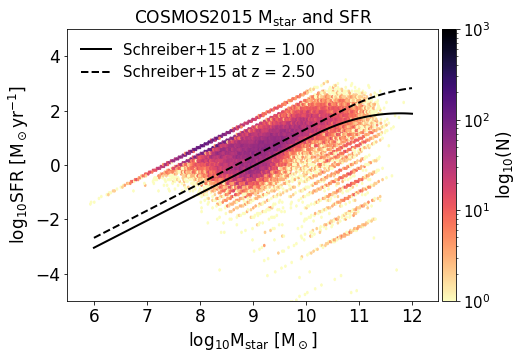

In [148]:
plt.figure(figsize=(7,5))

plt.hexbin(sample_z['MASS_BEST'], sample_z['SFR_BEST'], gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma_r')
plt.plot(np.log10(M_star), MS(1.0,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%1.0)
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)

cb = plt.colorbar(fraction = 0.04, pad = 0.01)
cb.set_label(label = r'$\log_{10}$(N)', size = 17) # Number of points inside each bin / gridsize = 200
cb.ax.tick_params(labelsize = 15)
plt.clim(1e0, 1e3)

plt.xlim(5.5, 12.5)
plt.ylim(-5, 5)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.title(r'COSMOS2015 M$_\mathrm{star}$ and SFR', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2, loc = 'upper left')

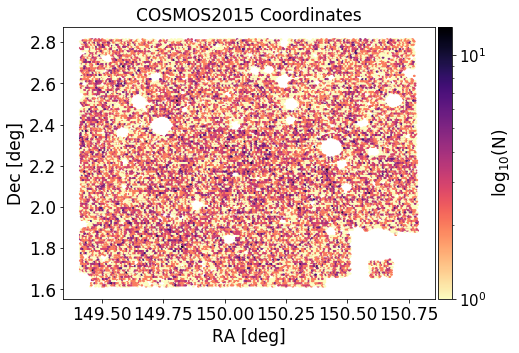

In [159]:
plt.figure(figsize=(7,5))
plt.hexbin(sample_z['RA_Laigle'], sample_z['DEC_Laigle'], gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma_r')

cb = plt.colorbar(fraction = 0.04, pad = 0.01)
cb.set_label(label = r'$\log_{10}$(N)', size = 17) # Number of points inside each bin / gridsize = 200
cb.ax.tick_params(labelsize = 15)
# plt.clim(1e0, 1e1)

plt.xlabel(r'RA [deg]', fontsize = 17)
plt.ylabel(r'Dec [deg]', fontsize = 17)
plt.title(r'COSMOS2015 Coordinates', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

# Run CIGALE for each redshift bin fitting continuum (continuum is ready to be delivered)

## Analyse the results and compute gas-phase metallicity and logU

## Divide in each redshift bin the sample per gas-phase metallicity and re-fit continuum+lines

In [171]:
redshift_1_2      = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                               'Redshift_1.50-2.00/continuum/results.fits', format = 'fits')

data_redshift_1_2 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                               'Redshift_1.50-2.00/'
                               'COSMOS_laigle_MOONS_2021_zCUT_BPT_1.50-2.00_All-info_zCUT.fits', format = 'fits')

# i) Compare the SFR and Mstar derived with the COSMOS2015 values

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


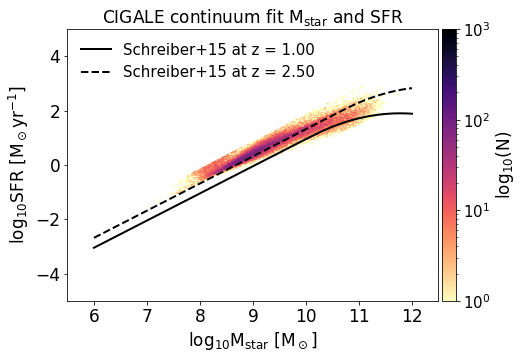

In [172]:
plt.figure(figsize=(7,5))

plt.hexbin(np.log10(redshift_1_2['bayes.stellar.m_star']), np.log10(redshift_1_2['bayes.sfh.sfr']),
           gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma_r')
plt.plot(np.log10(M_star), MS(1.0,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%1.0)
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)

cb = plt.colorbar(fraction = 0.04, pad = 0.01)
cb.set_label(label = r'$\log_{10}$(N)', size = 17) # Number of points inside each bin / gridsize = 200
cb.ax.tick_params(labelsize = 15)
plt.clim(1e0, 1e3)

plt.xlim(5.5, 12.5)
plt.ylim(-5, 5)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.title(r'CIGALE continuum fit M$_\mathrm{star}$ and SFR', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2, loc = 'upper left')

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


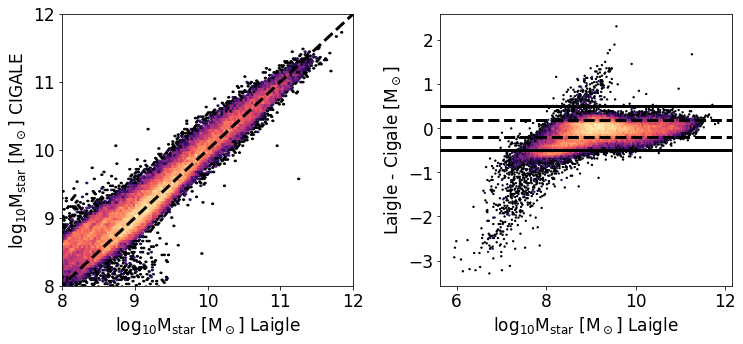

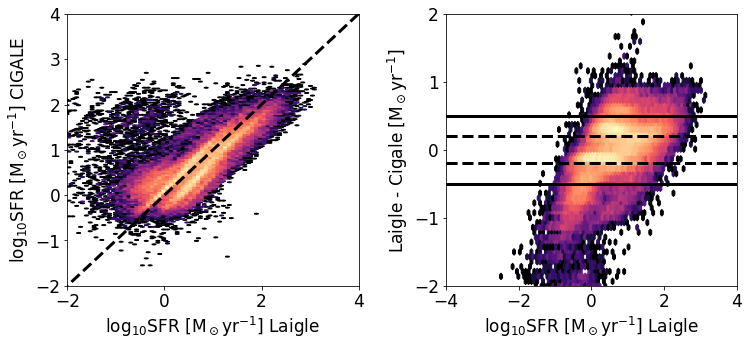

In [213]:
mass_lines = np.linspace(7, 13, 100)
sfr_lines  = np.linspace(-4, 4, 100)

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.hexbin(sample_z['MASS_BEST'], np.log10(redshift_1_2['bayes.stellar.m_star']),
           gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma')
axA.plot(mass_lines, mass_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(8, 12)
axA.set_ylim(8, 12)
axA.set_ylabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.hexbin(sample_z['MASS_BEST'], sample_z['MASS_BEST']-np.log10(redshift_1_2['bayes.stellar.m_star']),
           gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ Laigle', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.hexbin(sample_z['SFR_BEST'], np.log10(redshift_1_2['bayes.sfh.sfr']),
           gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma')
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-2, 4)
axA.set_ylim(-2, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.hexbin(sample_z['SFR_BEST'], sample_z['SFR_BEST']-np.log10(redshift_1_2['bayes.sfh.sfr']),
           gridsize = 200, bins = 'log', mincnt = 1, cmap = 'magma')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-4, 4)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


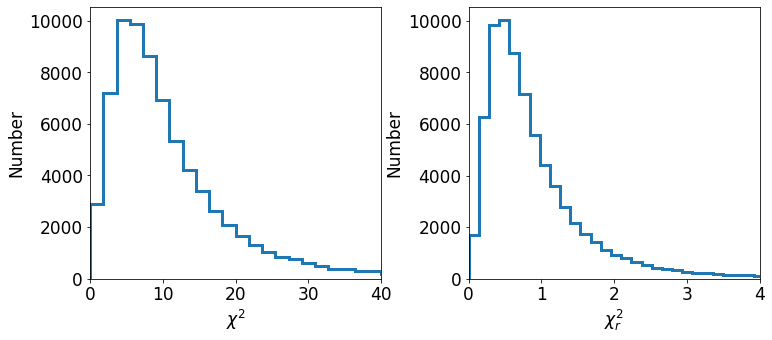

In [187]:
#---------------------------------------------------------------------------------
fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.hist(redshift_1_2['best.chi_square'], bins = 270, lw = 3, histtype = 'step')
axA.set_xlim(0, 40)
axA.set_ylabel(r'Number', fontsize = 17)
axA.set_xlabel(r'$\chi^2$', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.hist(redshift_1_2['best.reduced_chi_square'], bins = 270, lw = 3, histtype = 'step')
axB.set_xlim(0, 4)
axB.set_ylabel(r'Number', fontsize = 17)
axB.set_xlabel(r'$\chi_r^2$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------

# ii) Check the SEDs in the diagram

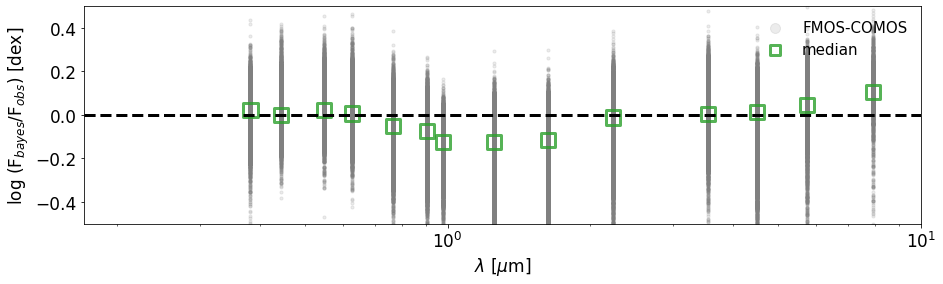

In [175]:
plt.figure(figsize = (15,4))
for i in range(1, len(bands_nolines)): # I dont have NUV in this bins so I took it out for the plot
# for i in range(len(bands_nolines)):
    
    data_high_snr   = data_redshift_1_2[data_redshift_1_2[bands_nolines[i]]/data_redshift_1_2[bands_nolines[i]+'_err'] > 3]
    
    continuum_fit_high_snr = redshift_1_2[np.where(data_redshift_1_2[bands_nolines[i]]/data_redshift_1_2[bands_nolines[i]+'_err'] > 3)]
    
    dif_best_obs_help_data = np.log10(continuum_fit_high_snr['bayes.'+bands_nolines[i]]) - np.log10(data_high_snr[bands_nolines[i]])
    
    x_help_data = np.full(len(dif_best_obs_help_data), wl_phot[i])
    
    ce =  plt.scatter(x_help_data, dif_best_obs_help_data, c = 'gray', marker = 'o', s = 10, alpha = 0.15)
    
    plt.scatter(wl_phot[i], np.nanmedian(dif_best_obs_help_data[np.isfinite(dif_best_obs_help_data)]), s = 200, lw = 3, marker = 's', alpha = 0.8, facecolors='none', edgecolors='C2')

plt.xlabel('$\lambda$ [$\mu$m]', fontsize = 17)
plt.ylabel('log (F$_{bayes}$/F$_{obs}$) [dex]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.ylim(-0.5, 0.5)
plt.xlim(0.17, 10)
plt.xscale('log')
# plt.yscale('symlog')
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(['FMOS-COMOS', 'median'], frameon = False, prop = {'size': 15}, loc = 'upper right',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})    
plt.axhline(y = 0, ls = '--', lw = 3, c = 'k')

# iii) Check metallicity distribution and logU distribution

In [176]:
# Mannuci private 
# Curti et al., 2020
def FMR(logm, logsfr):
    par=[8.779, 2.06, 0.311, 10.106, 0.559]
    logm0 = par[3] + par[4]*logsfr
    met = par[0] - par[2]/par[1] * np.log10(1+(10**(logm0-logm))**par[1])
    return(met)

def OH_to_zgas(OH):
    return ( 0.0142*10**(OH - 8.76) ) # our models

In [178]:
metal_curti_FMR_laigle = FMR(sample_z['MASS_BEST'], sample_z['SFR_BEST'])

metal_curti_FMR_cigale = FMR(np.log10(redshift_1_2['bayes.stellar.m_star']),
                             np.log10(redshift_1_2['bayes.sfh.sfr']))

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


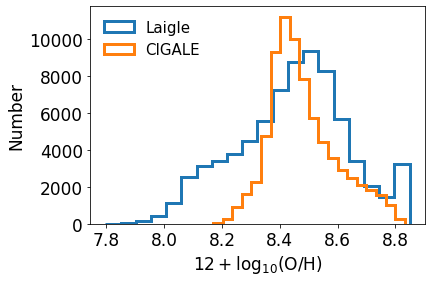

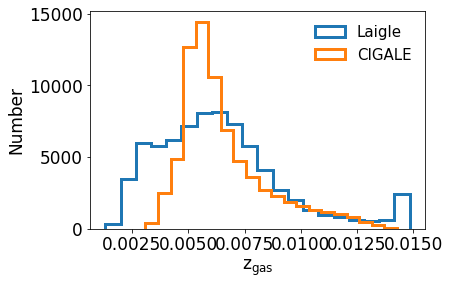

In [195]:
plt.figure()
plt.hist(metal_curti_FMR_laigle+0.07, bins = 20, histtype = 'step', lw = 3, label = 'Laigle')
plt.hist(metal_curti_FMR_cigale+0.07, bins = 20, histtype = 'step', lw = 3, label = 'CIGALE')
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$12+\log_{10}(\mathrm{O/H})$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'best')

plt.figure()
plt.hist(OH_to_zgas(metal_curti_FMR_laigle), bins = 20, histtype = 'step', lw = 3, label = 'Laigle')
plt.hist(OH_to_zgas(metal_curti_FMR_cigale), bins = 20, histtype = 'step', lw = 3, label = 'CIGALE')
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$\mathrm{z_{gas}}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'best')

# iv) Create the new sample divided in metal bins

In [190]:
os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/Redshift_1.50-2.00/metal_bins/')
os.system('mkdir //Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/Redshift_1.50-2.00/metal_bins/')

0

In [191]:
continuum_fit      = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                                'Redshift_1.50-2.00/continuum/results.fits', format = 'fits')

data               = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                                'Redshift_1.50-2.00/'
                                'COSMOS_laigle_MOONS_2021_zCUT_BPT_1.50-2.00_All-info_zCUT.fits', format = 'fits')

In [218]:
# 1) Compute the gas-phase metallicity
metal_curti_FMR_cigale = FMR(np.log10(redshift_1_2['bayes.stellar.m_star']),
                             np.log10(redshift_1_2['bayes.sfh.sfr']))

# 2) Change it to CIGALE gas-phase compatible metallicities
metallicities = OH_to_zgas(metal_curti_FMR_cigale)

# 3) Fake galaxy is filtered to be added
lines = ['Ly-alpha',
         'HeII-164.0',
         'OIII-166.5',
         'CIII-190.9',
         'MgII-279.8',
         'OII-372.7',
         'H-9',
         'NeIII-386.9',
         'HeI-388.9',
         'H-8',
         'NeIII-396.8',
         'H-epsilon',
         'H-delta',
         'H-gamma',
         'OIII-436.3',
         'H-beta',
         'OIII-495.9',
         'OIII-500.7',
         'HeI-587.6',
         'OI-630.0',
         'NII-654.8',
         'H-alpha',
         'NII-658.4',
         'SII-671.6',
         'SII-673.1', 
         'ArIII-713.6']

fake  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                   'COSMOS_laigle_MOONS_2021_zCUT.fits', format  = 'fits')
fake  = fake[fake['id'] == 993206]

for i in range(len(lines)):
    fake['line.'+lines[i]]        = 8.271998799359089e-19
    fake['line.'+lines[i]+'_err'] = 8.271998799359089e-21

# 4) Binning in metallicity and adding fake object to the files 
import warnings
warnings.filterwarnings("ignore") # To stop showing the warnings and check the bin better

min_val = min(metallicities)
max_val = max(metallicities)

a = abs(min_val)
while(a <= max_val):
    
    os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                'Redshift_1.50-2.00/metal_bins/metal_%.5f-%.5f/'
                'COSMOS_laigle_MOONS_2021_zCUT_BPT_%.5f-%.5f.fits'%(a, a+step, a, a+step))    
    
    step = 0.002
    sample = metallicities[(metallicities>a)&(metallicities<a+step)]
    
    metal = vstack([sample, fake])    
    metal['id'][:][-1] = -999999    # This is the fake galaxy ID    
    
    os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
              'Redshift_1.50-2.00/metal_bins/metal_%.5f-%.5f/'%(a, a+step))
    
    # Saving files in each folder
    metal.write('/Users/lam/Desktop/MOONS/MOONS_2021/Laigle_all/'
                'Redshift_1.50-2.00/metal_bins/metal_%.5f-%.5f/'
                'COSMOS_laigle_MOONS_2021_zCUT_BPT_%.5f-%.5f.fits'%(a, a+step, a, a+step), format = 'fits')

    print('Metallicity range %.5f - %.5f, objects = %i'%(a, a+step, len(sample)))
    a += step
del(a)

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


Metallicity range 0.00310 - 0.00510, objects = 14219
Metallicity range 0.00510 - 0.00710, objects = 38897
Metallicity range 0.00710 - 0.00910, objects = 11918
Metallicity range 0.00910 - 0.01110, objects = 5656
Metallicity range 0.01110 - 0.01310, objects = 3028
Metallicity range 0.01310 - 0.01510, objects = 328


In [ ]:
# Repeat all steps from i) to iv) for each redshift bin
# Then fit the data with CIGALE using the nebular module and fixing gas-phase metallicity and logU